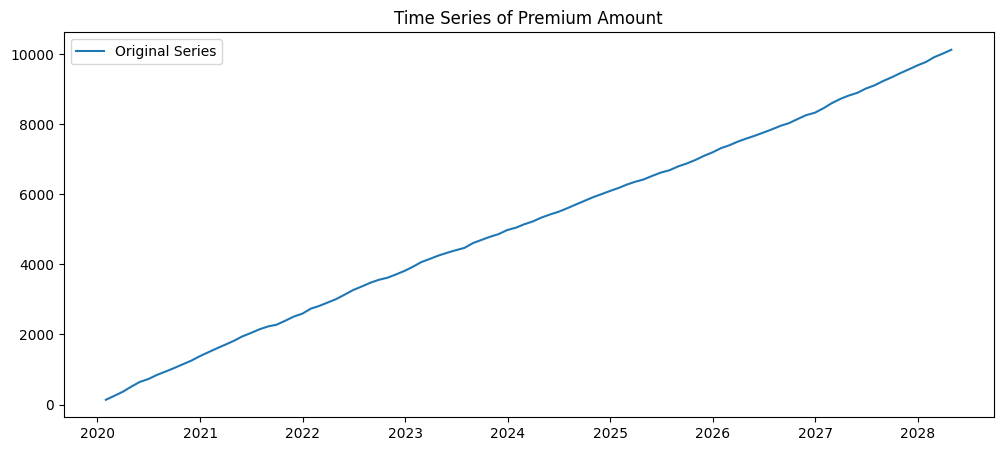

ADF Statistic: -0.6312777182673567
p-value: 0.8637567802673147
Series is not stationary. Differencing needed.


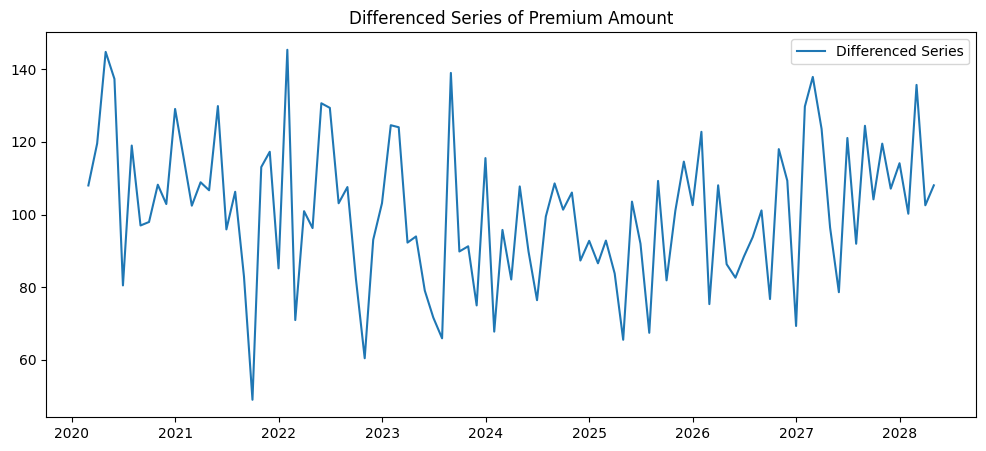

ADF Statistic: -9.15840200294013
p-value: 2.572286538327882e-15
Differenced series is stationary.


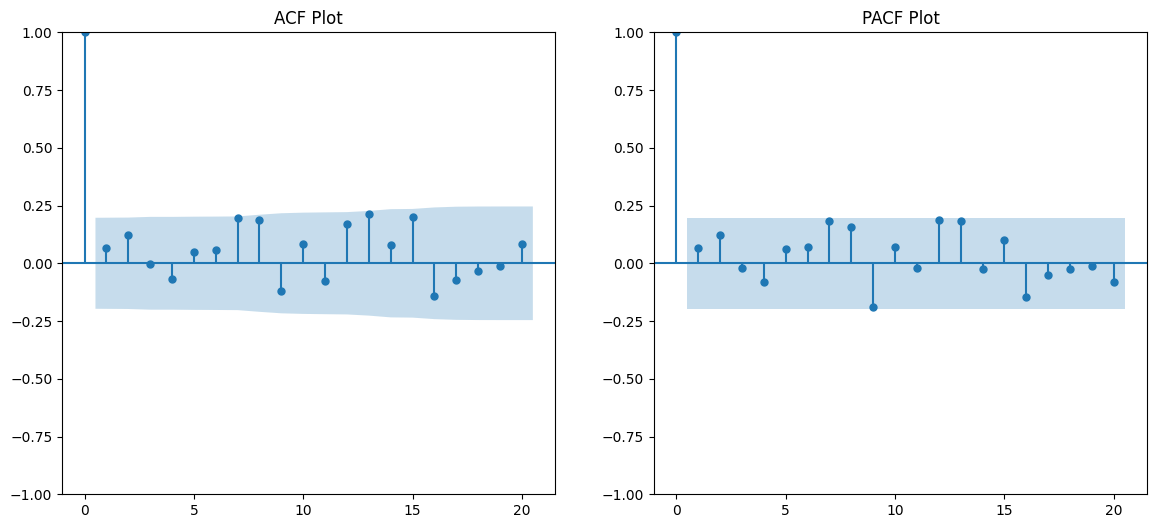

ARIMA(0,1,0) - AIC: 1200.25857172913
ARIMA(0,1,1) - AIC: 1113.2404704144294
ARIMA(0,1,2) - AIC: 1058.4816336342717
ARIMA(1,1,0) - AIC: 941.3072970166908
ARIMA(1,1,1) - AIC: 884.1213188192378
ARIMA(1,1,2) - AIC: 886.021042999679
ARIMA(2,1,0) - AIC: 912.2011289749009
ARIMA(2,1,1) - AIC: 886.0135982053519
ARIMA(2,1,2) - AIC: 887.947882752546
Best ARIMA model order: (1, 1, 1) with AIC: 884.1213188192378
                               SARIMAX Results                                
Dep. Variable:         Premium_Amount   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -439.061
Date:                Mon, 28 Oct 2024   AIC                            884.121
Time:                        10:22:46   BIC                            891.907
Sample:                    01-31-2020   HQIC                           887.271
                         - 04-30-2028                                         
Covariance Type:                  opg       

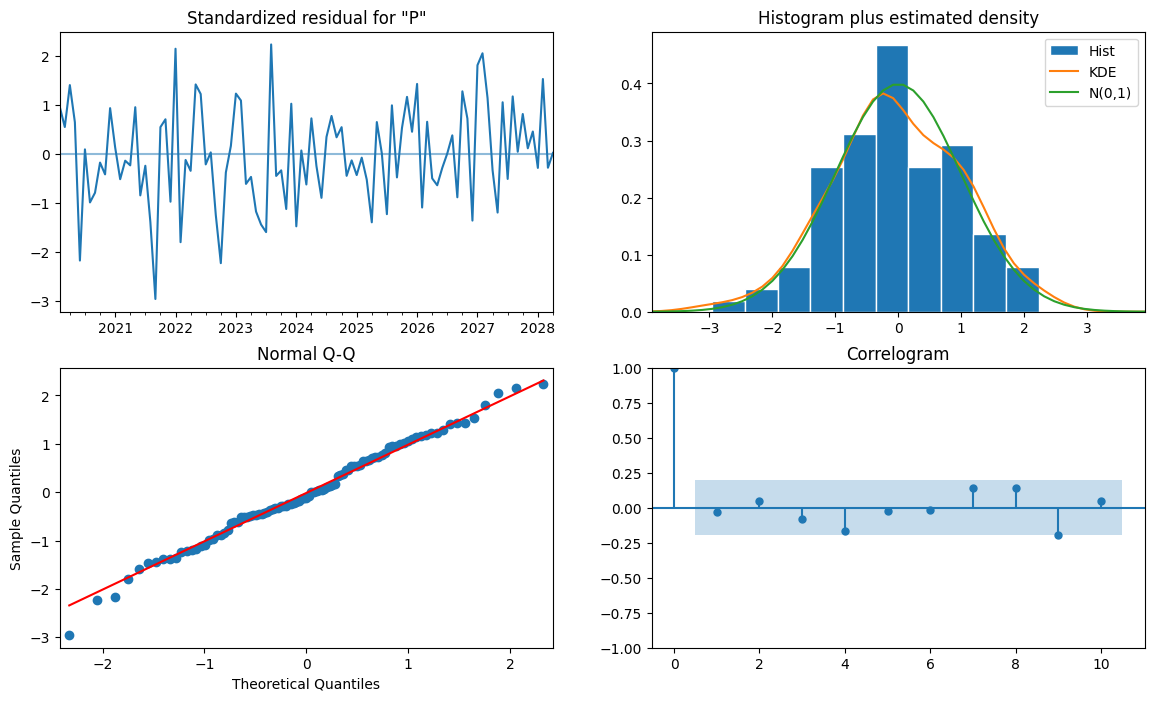

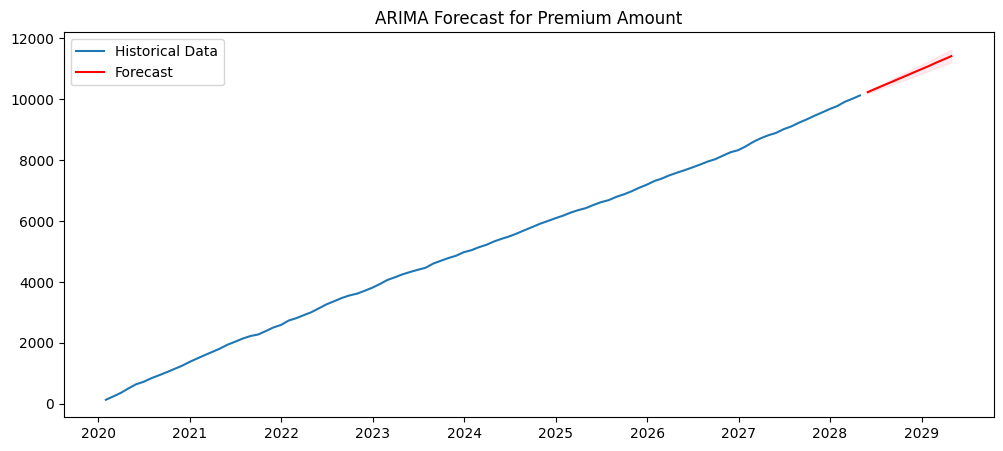

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic time series data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
premium_amounts = np.cumsum(np.random.normal(loc=100, scale=20, size=100))  # Cumulative sum to mimic a trend
df = pd.DataFrame({'Date': dates, 'Premium_Amount': premium_amounts})
df.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Original Series")
plt.title("Time Series of Premium Amount")
plt.legend()
plt.show()

# Step 1: Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return p-value for further checks

p_value = adf_test(df['Premium_Amount'])
if p_value < 0.05:
    print("Series is stationary.")
else:
    print("Series is not stationary. Differencing needed.")

# Step 2: Differencing the series to make it stationary
df_diff = df['Premium_Amount'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df_diff, label="Differenced Series")
plt.title("Differenced Series of Premium Amount")
plt.legend()
plt.show()

# Re-run ADF test on differenced series
p_value_diff = adf_test(df_diff)
if p_value_diff < 0.05:
    print("Differenced series is stationary.")
else:
    print("Differenced series is still not stationary; consider further differencing.")

# Step 3: Plot ACF and PACF to identify p and q
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=20)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Based on ACF and PACF, try different values for p and q
# For this example, assume initial choices based on ACF/PACF plots are p=1, d=1, q=1

# Step 4: Fit ARIMA model and check AIC for optimization
# Trying a range of values to minimize AIC
best_aic = np.inf
best_order = None
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(df['Premium_Amount'], order=(p, 1, q))
            results = model.fit()
            print(f'ARIMA({p},1,{q}) - AIC: {results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, 1, q)
        except:
            continue

print(f"Best ARIMA model order: {best_order} with AIC: {best_aic}")

# Step 5: Fit the final model
model = ARIMA(df['Premium_Amount'], order=best_order)
results = model.fit()
print(results.summary())

# Step 6: Plot diagnostics
results.plot_diagnostics(figsize=(14, 8))
plt.show()

# Step 7: Forecasting with the best model
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Historical Data")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast for Premium Amount")
plt.show()


To provide a more detailed explanation of how to determine the values of 
𝑝
p, 
𝑑
d, and 
𝑞
q for an ARIMA model, let’s break down the process further. We’ll include visualizations, calculations, and reasoning behind selecting these parameters based on the characteristics of the time series data.

Step-by-Step Guide to Determine 
𝑝
p, 
𝑑
d, and 
𝑞
q
1. Understanding 
𝑑
d (Differencing Order)
Purpose: The differencing order 
𝑑
d is used to make a non-stationary time series stationary by removing trends and seasonality.

Stationarity Check: You can use the ADF (Augmented Dickey-Fuller) test to check for stationarity. If the p-value is greater than 0.05, the series is non-stationary, and differencing is required.

First Differencing: If the series is not stationary, perform first differencing (y[t] - y[t-1]) and check again. You might need to difference multiple times (though typically 
𝑑
d is 0, 1, or 2).

2. Choosing 
𝑝
p (AR Order)
ACF and PACF Plots: After differencing, plot the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to identify the autoregressive (AR) and moving average (MA) terms.

PACF: Look at the PACF plot. The point at which the PACF cuts off (drops to zero) gives you an estimate of 
𝑝
p. If it shows a significant spike at lag 1 and then drops off, set 
𝑝
=
1
p=1.

ACF: The ACF can help confirm the 
𝑝
p value by ensuring the autocorrelations at lags less than 
𝑝
p are significant.

3. Choosing 
𝑞
q (MA Order)
ACF Plot: Use the ACF plot to determine 
𝑞
q. The number of lags that are significant in the ACF plot gives you an estimate for 
𝑞
q. If the ACF cuts off after lag 1, set 
𝑞
=
1
q=1.
4. Model Selection Using AIC/BIC
After getting initial estimates for 
𝑝
p, 
𝑑
d, and 
𝑞
q, fit various combinations of these parameters and choose the model with the lowest AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion). Lower values indicate a better fit.
Example Code to Determine 
𝑝
p, 
𝑑
d, and 
𝑞
q
Below is the full code with detailed comments explaining how to determine 
𝑝
p, 
𝑑
d, and 
𝑞
q using ADF tests, ACF, and PACF plots, followed by model fitting:

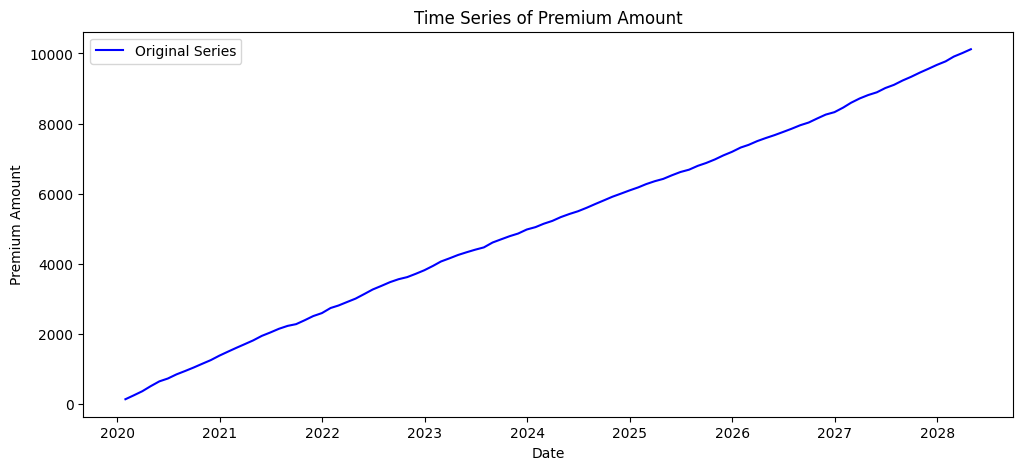

ADF Statistic: -0.6312777182673567
p-value: 0.8637567802673147
Original series is not stationary. Differencing needed.


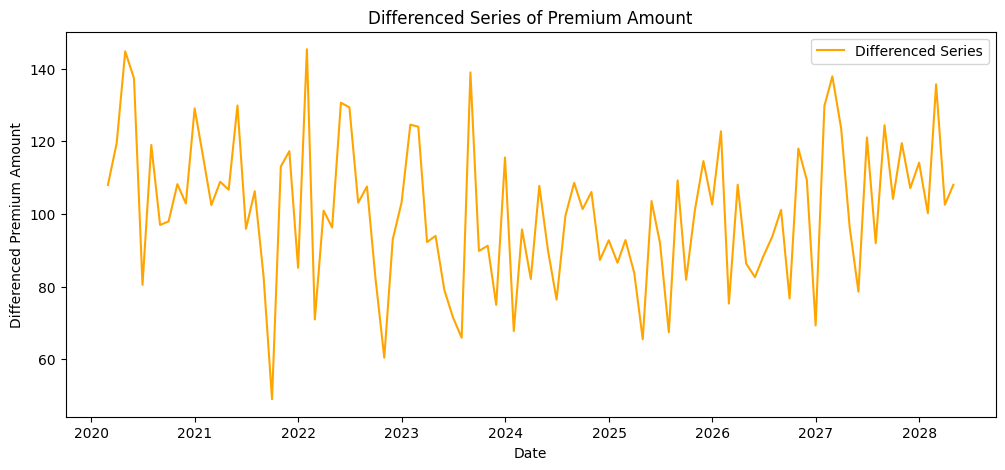

ADF Statistic: -9.15840200294013
p-value: 2.572286538327882e-15
Differenced series is stationary.


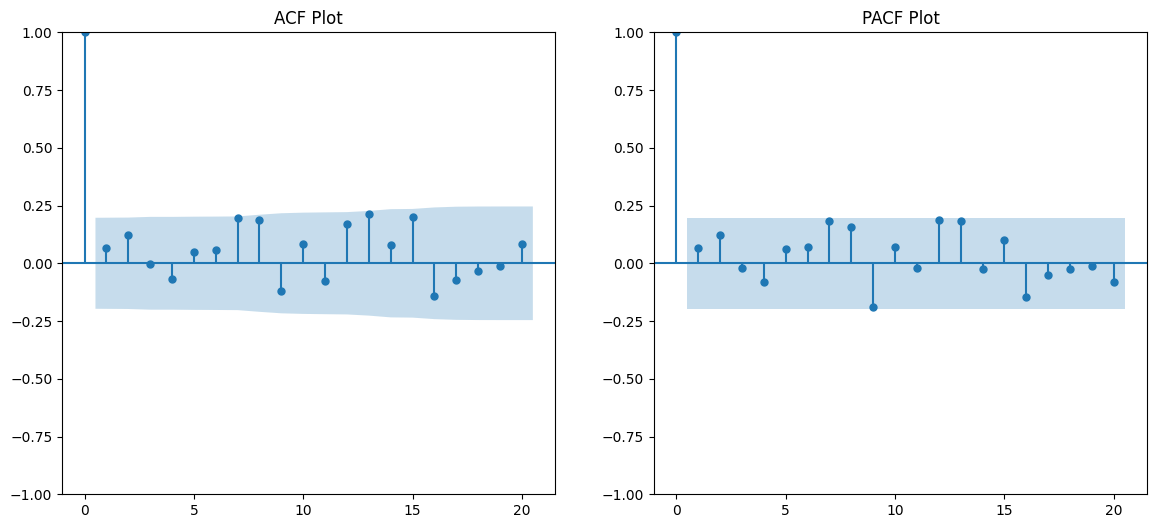

ARIMA(0,1,0) - AIC: 1200.25857172913
ARIMA(0,1,1) - AIC: 1113.2404704144294
ARIMA(0,1,2) - AIC: 1058.4816336342717
ARIMA(1,1,0) - AIC: 941.3072970166908
ARIMA(1,1,1) - AIC: 884.1213188192378
ARIMA(1,1,2) - AIC: 886.021042999679
ARIMA(2,1,0) - AIC: 912.2011289749009
ARIMA(2,1,1) - AIC: 886.0135982053519
ARIMA(2,1,2) - AIC: 887.947882752546
Best ARIMA model order: (1, 1, 1) with AIC: 884.1213188192378
                               SARIMAX Results                                
Dep. Variable:         Premium_Amount   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -439.061
Date:                Mon, 28 Oct 2024   AIC                            884.121
Time:                        10:24:06   BIC                            891.907
Sample:                    01-31-2020   HQIC                           887.271
                         - 04-30-2028                                         
Covariance Type:                  opg       

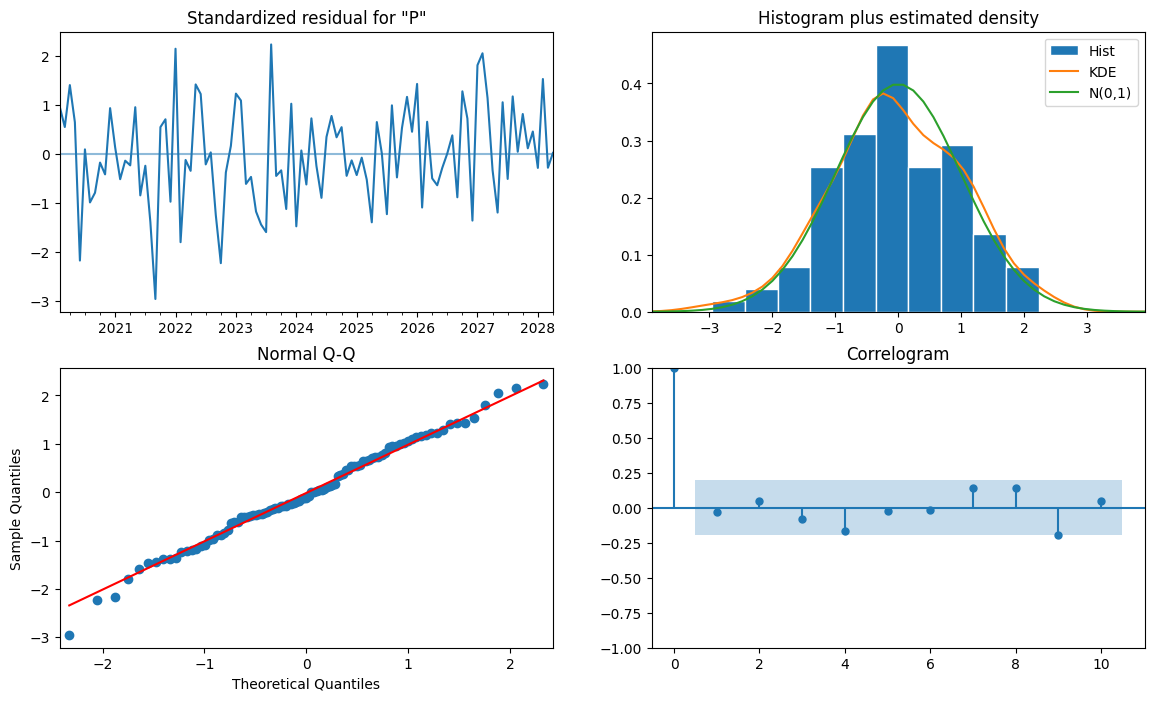

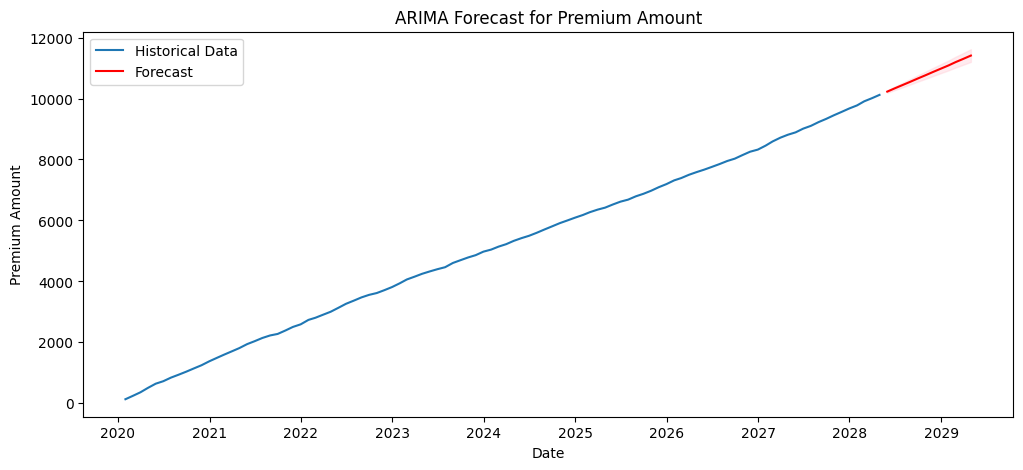

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic time series data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
premium_amounts = np.cumsum(np.random.normal(loc=100, scale=20, size=100))  # Cumulative sum to mimic a trend
df = pd.DataFrame({'Date': dates, 'Premium_Amount': premium_amounts})
df.set_index('Date', inplace=True)

# Step 1: Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Original Series", color='blue')
plt.title("Time Series of Premium Amount")
plt.xlabel("Date")
plt.ylabel("Premium Amount")
plt.legend()
plt.show()

# Step 2: Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return p-value for further checks

# Check ADF for original series
p_value = adf_test(df['Premium_Amount'])
if p_value < 0.05:
    print("Original series is stationary.")
else:
    print("Original series is not stationary. Differencing needed.")

# Step 3: Differencing the series to make it stationary
df_diff = df['Premium_Amount'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df_diff, label="Differenced Series", color='orange')
plt.title("Differenced Series of Premium Amount")
plt.xlabel("Date")
plt.ylabel("Differenced Premium Amount")
plt.legend()
plt.show()

# Re-run ADF test on differenced series
p_value_diff = adf_test(df_diff)
if p_value_diff < 0.05:
    print("Differenced series is stationary.")
else:
    print("Differenced series is still not stationary; consider further differencing.")

# Step 4: Plot ACF and PACF to identify p and q
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=20)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Based on the ACF/PACF plots, choose initial p and q values
# For example:
p = 1  # Assume PACF shows significant spike at lag 1
d = 1  # We applied first differencing
q = 1  # Assume ACF shows significant spike at lag 1

# Step 5: Fit ARIMA model and check AIC for optimization
best_aic = np.inf
best_order = None

# Try a range of values to minimize AIC
for p in range(3):  # Testing p = 0, 1, 2
    for q in range(3):  # Testing q = 0, 1, 2
        try:
            model = ARIMA(df['Premium_Amount'], order=(p, d, q))
            results = model.fit()
            print(f'ARIMA({p},{d},{q}) - AIC: {results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
        except:
            continue

print(f"Best ARIMA model order: {best_order} with AIC: {best_aic}")

# Step 6: Fit the final model
final_model = ARIMA(df['Premium_Amount'], order=best_order)
final_results = final_model.fit()
print(final_results.summary())

# Step 7: Plot diagnostics
final_results.plot_diagnostics(figsize=(14, 8))
plt.show()

# Step 8: Forecasting with the best model
forecast = final_results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 5))
plt.plot(df['Premium_Amount'], label="Historical Data")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color="red", label="Forecast")
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast for Premium Amount")
plt.xlabel("Date")
plt.ylabel("Premium Amount")
plt.show()


To implement the Incident Frequency Forecasting use case using dummy insurance data, we'll follow these steps:

Create Dummy Insurance Data: Simulate a dataset representing the frequency of operational incidents over time.
Exploratory Data Analysis (EDA): Visualize and analyze the data to understand trends and patterns.
Modeling: Fit ARIMA, SARIMA, and SARIMAX models to forecast future incident frequencies.
Forecasting: Generate and visualize forecasts from the fitted models.
Below is a complete code example in a single window:

Complete Code Example

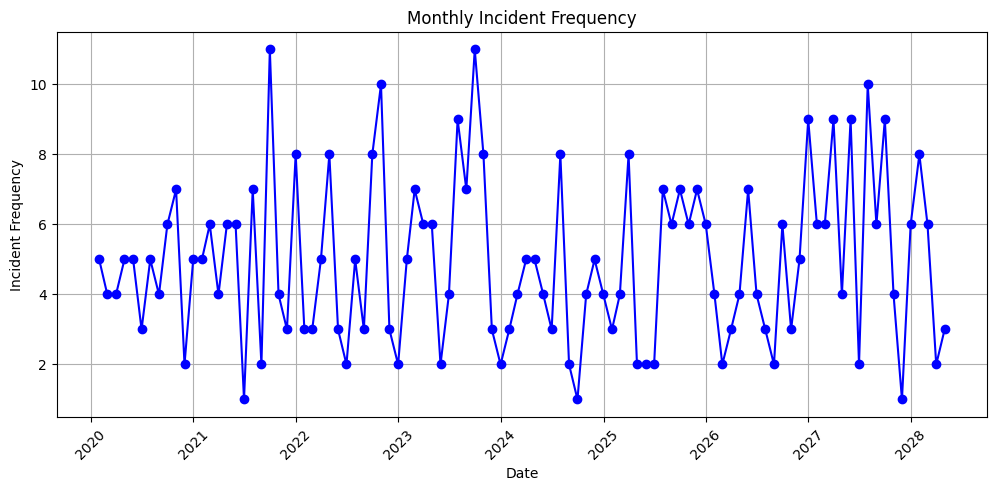

ADF Statistic: -9.62799295099103
p-value: 1.6408820122091886e-16
Original series is stationary.


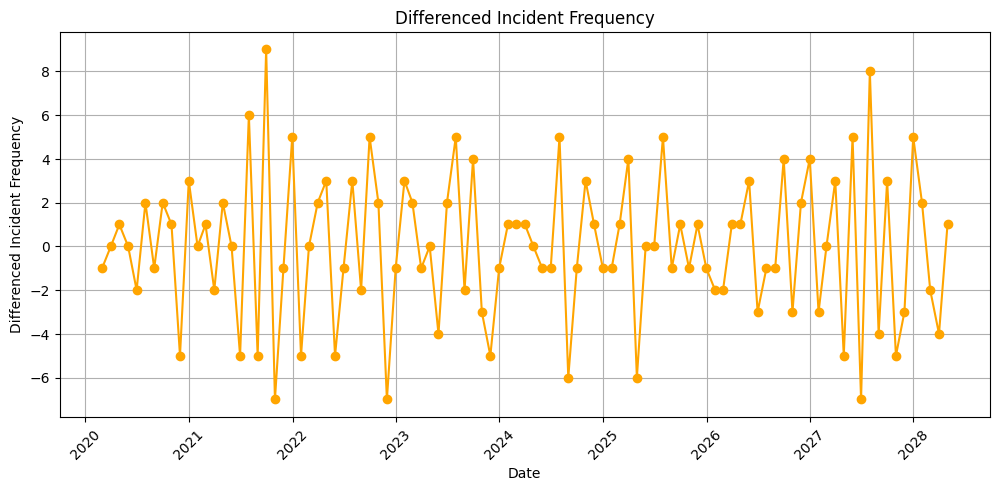

ADF Statistic: -7.283151996741709
p-value: 1.4822274009286923e-10
Differenced series is stationary.


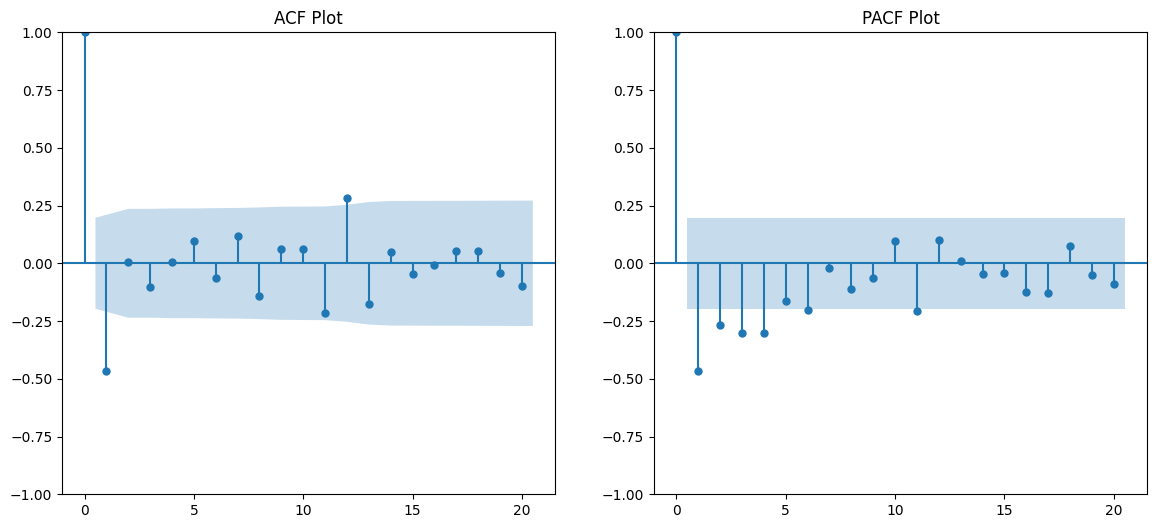

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:     Incident_Frequency   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -228.654
Date:                Mon, 28 Oct 2024   AIC                            463.309
Time:                        11:21:48   BIC                            471.094
Sample:                    01-31-2020   HQIC                           466.459
                         - 04-30-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0294      0.106      0.277      0.782      -0.178       0.237
ma.L1         -1.0000     51.802     -0.019      0.985    -102.529     100.529
sigma2         5.6719    293.60

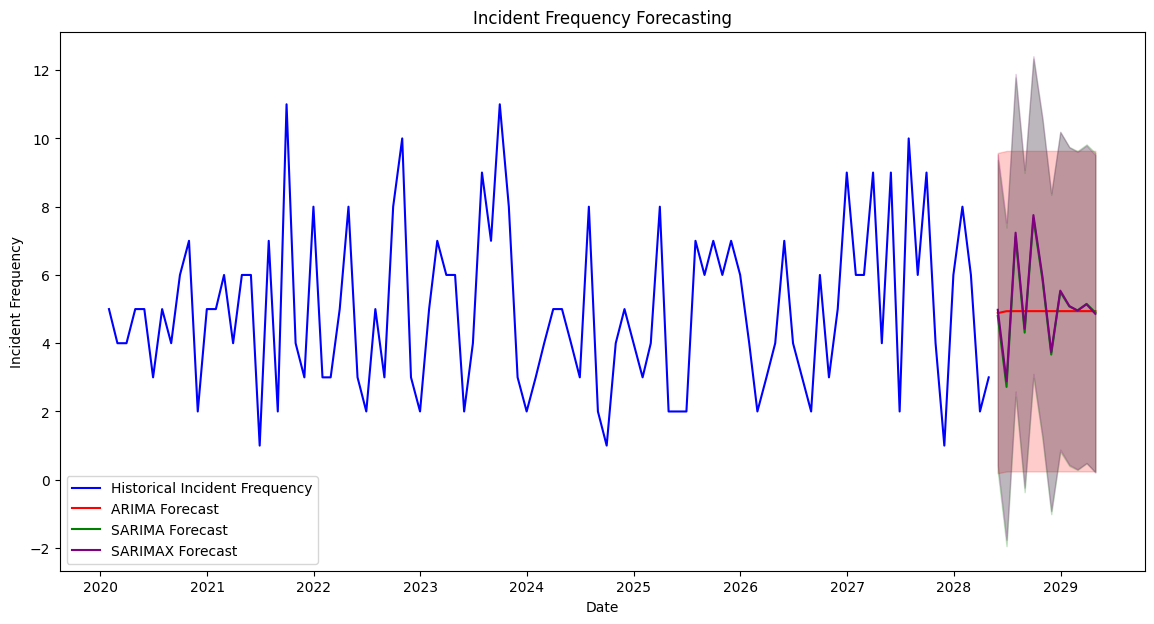

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Step 1: Create Dummy Insurance Incident Frequency Data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
incident_frequencies = np.random.poisson(lam=5, size=len(dates))  # Simulating incidents
df = pd.DataFrame({'Date': dates, 'Incident_Frequency': incident_frequencies})
df.set_index('Date', inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 5))
plt.plot(df['Incident_Frequency'], marker='o', linestyle='-', color='blue')
plt.title("Monthly Incident Frequency")
plt.xlabel("Date")
plt.ylabel("Incident Frequency")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return p-value for further checks

# ADF test for original series
p_value = adf_test(df['Incident_Frequency'])
if p_value < 0.05:
    print("Original series is stationary.")
else:
    print("Original series is not stationary. Differencing needed.")

# Step 3: Differencing the series to make it stationary
df_diff = df['Incident_Frequency'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(df_diff, marker='o', linestyle='-', color='orange')
plt.title("Differenced Incident Frequency")
plt.xlabel("Date")
plt.ylabel("Differenced Incident Frequency")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ADF test for differenced series
p_value_diff = adf_test(df_diff)
if p_value_diff < 0.05:
    print("Differenced series is stationary.")
else:
    print("Differenced series is still not stationary; consider further differencing.")

# Step 4: Plot ACF and PACF to identify p and q
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=20)
plt.title("ACF Plot")

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Based on ACF and PACF, choose initial p and q values
p = 1  # Assume PACF shows significant spike at lag 1
d = 1  # We applied first differencing
q = 1  # Assume ACF shows significant spike at lag 1

# Step 5: Fit ARIMA model
arima_model = ARIMA(df['Incident_Frequency'], order=(p, d, q))
arima_results = arima_model.fit()
print("ARIMA Model Summary:")
print(arima_results.summary())

# Step 6: Fit SARIMA model (Seasonal ARIMA)
# Let's assume a seasonal period of 12 (for monthly data)
seasonal_order = (1, 1, 1, 12)  # P, D, Q, S
sarima_model = SARIMAX(df['Incident_Frequency'], order=(p, d, q), seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()
print("SARIMA Model Summary:")
print(sarima_results.summary())

# Step 7: Fit SARIMAX model (with exogenous variable)
# For demonstration, we'll use a simple sine wave as an exogenous variable
exogenous = np.sin(np.linspace(0, 3 * np.pi, len(df)))  # Example exogenous variable
sarimax_model = SARIMAX(df['Incident_Frequency'], order=(p, d, q), seasonal_order=seasonal_order, exog=exogenous)
sarimax_results = sarimax_model.fit()
print("SARIMAX Model Summary:")
print(sarimax_results.summary())

# Step 8: Forecasting
forecast_steps = 12
forecast_arima = arima_results.get_forecast(steps=forecast_steps)
forecast_sarima = sarima_results.get_forecast(steps=forecast_steps)
forecast_sarimax = sarimax_results.get_forecast(steps=forecast_steps, exog=exogenous[-forecast_steps:])

# Prepare for plotting
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Step 9: Plot the forecasts
plt.figure(figsize=(14, 7))
plt.plot(df['Incident_Frequency'], label='Historical Incident Frequency', color='blue')
plt.plot(forecast_index, forecast_arima.predicted_mean, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_arima.conf_int()['lower Incident_Frequency'],
                 forecast_arima.conf_int()['upper Incident_Frequency'], color='red', alpha=0.2)

plt.plot(forecast_index, forecast_sarima.predicted_mean, label='SARIMA Forecast', color='green')
plt.fill_between(forecast_index,
                 forecast_sarima.conf_int()['lower Incident_Frequency'],
                 forecast_sarima.conf_int()['upper Incident_Frequency'], color='green', alpha=0.2)

plt.plot(forecast_index, forecast_sarimax.predicted_mean, label='SARIMAX Forecast', color='purple')
plt.fill_between(forecast_index,
                 forecast_sarimax.conf_int()['lower Incident_Frequency'],
                 forecast_sarimax.conf_int()['upper Incident_Frequency'], color='purple', alpha=0.2)

plt.title("Incident Frequency Forecasting")
plt.xlabel("Date")
plt.ylabel("Incident Frequency")
plt.legend()
plt.show()


To implement Loss Event Severity Modeling, we can create a project that simulates historical loss events, conducts exploratory data analysis (EDA), fits statistical models, and predicts potential future loss severities. Below is a complete code example that covers these steps.

Complete Code Example
This code simulates loss events, performs EDA, fits a distribution to the loss amounts, and uses regression modeling for predicting future losses.

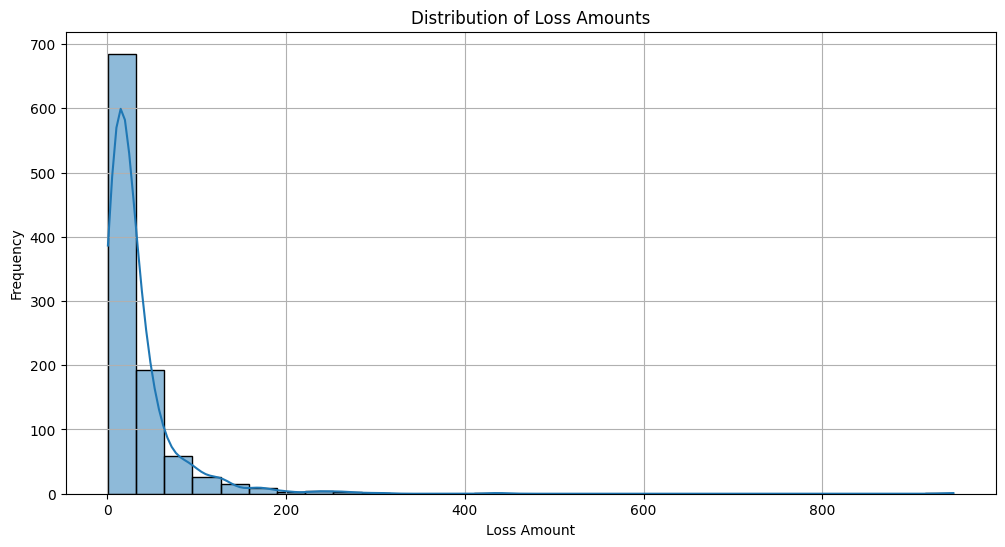

Summary Statistics:
count    1000.000000
mean       33.790585
std        49.132263
min         0.785632
25%        10.510884
50%        20.600203
75%        38.395642
max       946.462633
Name: Loss_Amount, dtype: float64


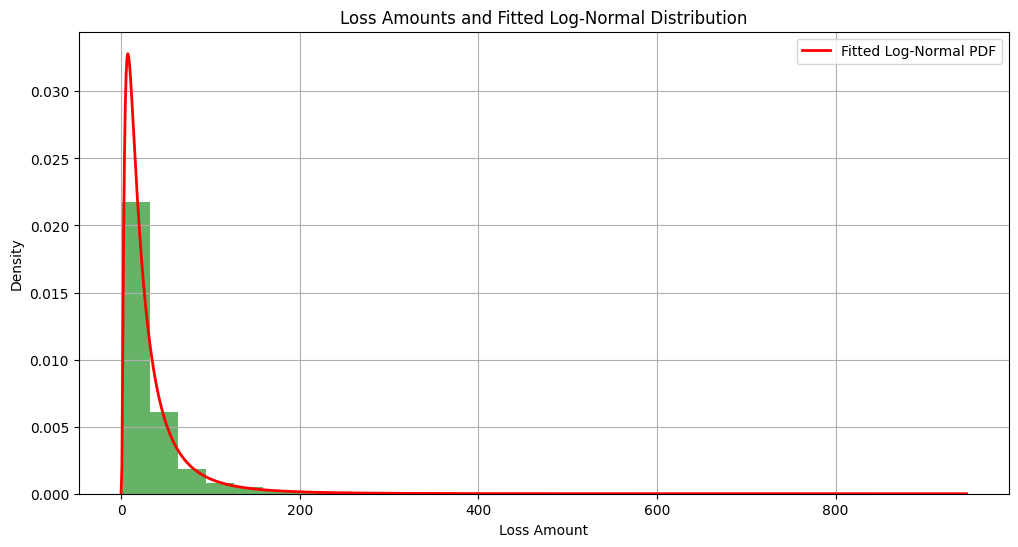

                            OLS Regression Results                            
Dep. Variable:            Loss_Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6347
Date:                Mon, 28 Oct 2024   Prob (F-statistic):              0.426
Time:                        11:23:30   Log-Likelihood:                -5312.6
No. Observations:                1000   AIC:                         1.063e+04
Df Residuals:                     998   BIC:                         1.064e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.4808      2

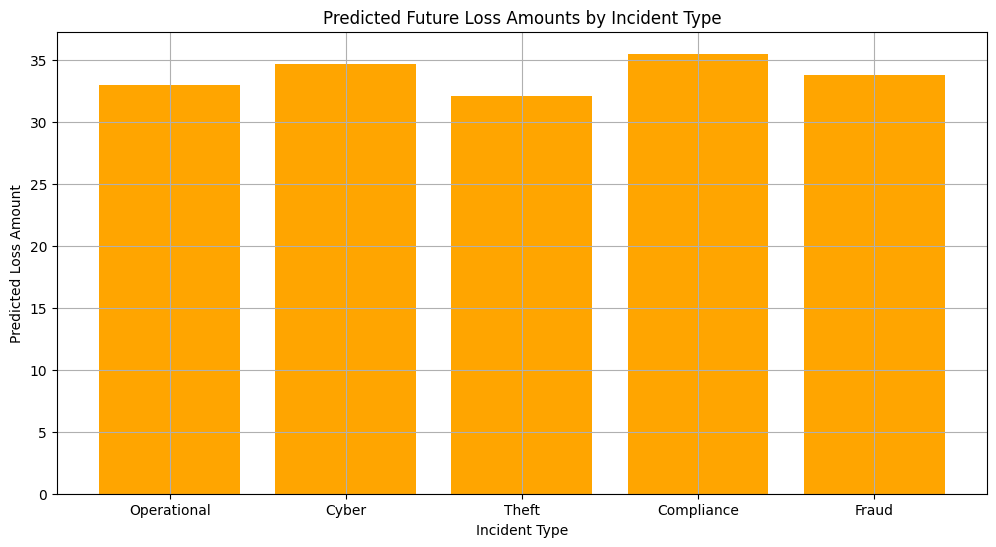

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Create Dummy Historical Loss Event Data
num_records = 1000
loss_event_ids = [f'LE{str(i).zfill(5)}' for i in range(1, num_records + 1)]
dates = pd.date_range(start='2015-01-01', periods=num_records, freq='D')

# Simulating loss amounts with a log-normal distribution
loss_amounts = np.random.lognormal(mean=3, sigma=1, size=num_records)

# Simulating incident types
incident_types = np.random.choice(['Fraud', 'Compliance', 'Operational', 'Theft', 'Cyber'], num_records)

# Creating DataFrame
loss_data = pd.DataFrame({
    'Loss_Event_ID': loss_event_ids,
    'Date': dates,
    'Loss_Amount': loss_amounts,
    'Incident_Type': incident_types
})

# Setting Date as the index
loss_data.set_index('Date', inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(loss_data['Loss_Amount'], bins=30, kde=True)
plt.title("Distribution of Loss Amounts")
plt.xlabel("Loss Amount")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Check the summary statistics
print("Summary Statistics:")
print(loss_data['Loss_Amount'].describe())

# Step 3: Fitting a Distribution to Loss Amounts
# Let's fit a log-normal distribution and plot the PDF
shape, loc, scale = stats.lognorm.fit(loss_data['Loss_Amount'])
x = np.linspace(0, max(loss_data['Loss_Amount']), 1000)
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)

plt.figure(figsize=(12, 6))
plt.hist(loss_data['Loss_Amount'], bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'r-', lw=2, label='Fitted Log-Normal PDF')
plt.title("Loss Amounts and Fitted Log-Normal Distribution")
plt.xlabel("Loss Amount")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Step 4: Regression Modeling for Predicting Future Loss Severities
# Convert incident types to categorical variables
loss_data['Incident_Type'] = loss_data['Incident_Type'].astype('category')
loss_data['Incident_Type_Code'] = loss_data['Incident_Type'].cat.codes

# Prepare the dataset for regression modeling
X = loss_data[['Incident_Type_Code']]
y = loss_data['Loss_Amount']

# Adding a constant for the regression model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

# Step 5: Predicting Future Loss Severities
# For demonstration, we'll create a new DataFrame for future predictions
future_incident_types = np.random.choice(['Fraud', 'Compliance', 'Operational', 'Theft', 'Cyber'], 10)
future_incident_type_codes = pd.Series(pd.Categorical(future_incident_types).codes)

# Create a DataFrame for future predictions
future_data = pd.DataFrame({
    'Incident_Type_Code': future_incident_type_codes,
    'Loss_Amount': np.nan  # Placeholder for predicted values
})

# Adding a constant for predictions
future_X = sm.add_constant(future_data['Incident_Type_Code'])

# Generate predictions
future_predictions = ols_model.predict(future_X)
future_data['Predicted_Loss_Amount'] = future_predictions

# Step 6: Visualize Future Predictions
print("\nFuture Loss Amount Predictions:")
print(future_data)

plt.figure(figsize=(12, 6))
plt.bar(future_incident_types, future_data['Predicted_Loss_Amount'], color='orange')
plt.title("Predicted Future Loss Amounts by Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Predicted Loss Amount")
plt.grid()
plt.show()


Risk Indicator Monitoring
Develop time series models to monitor key risk indicators (KRIs) over time, enabling proactive risk management.

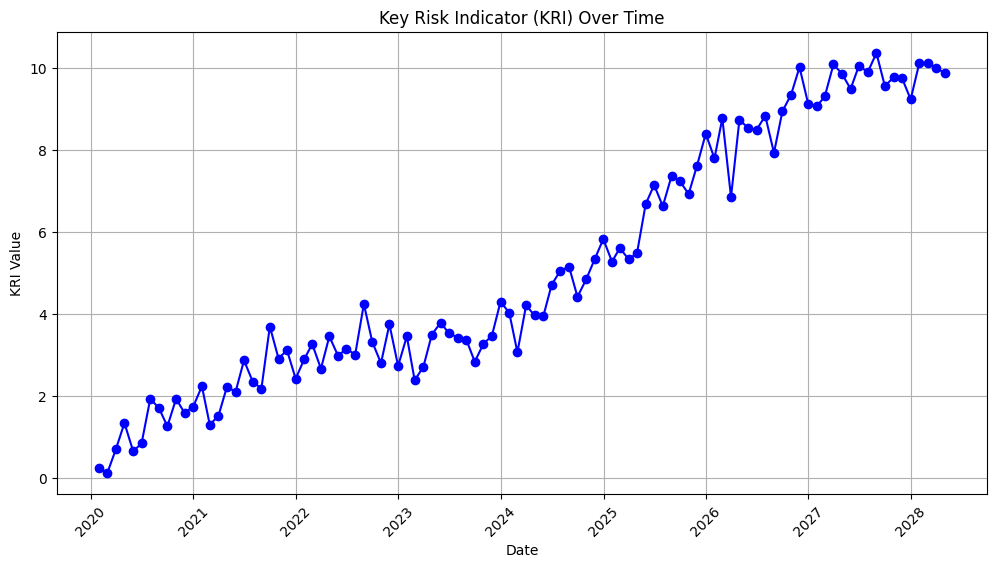

ADF Statistic: -0.08060225249610534
p-value: 0.951336675808074
Original series is not stationary. Differencing needed.


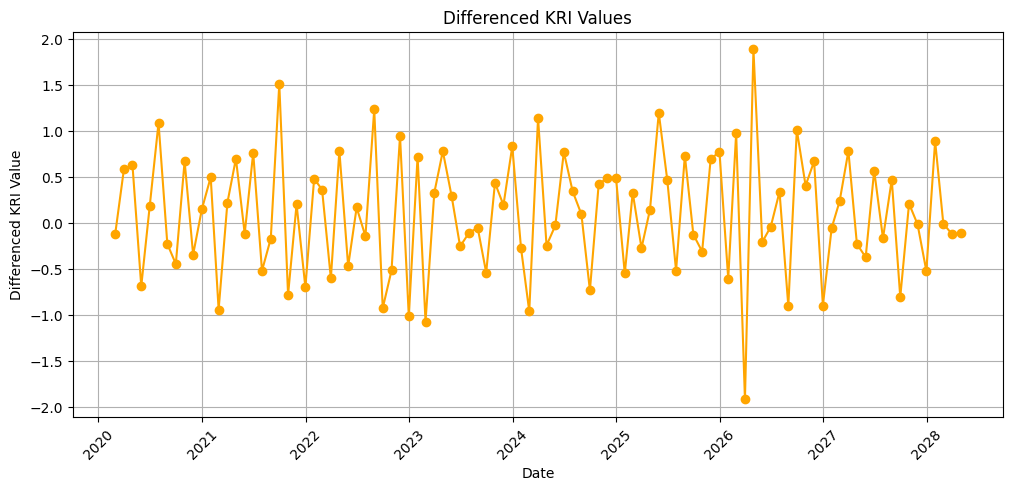

ADF Statistic: -8.674885096942354
p-value: 4.4437958830083614e-14
Differenced series is stationary.


<Axes: >

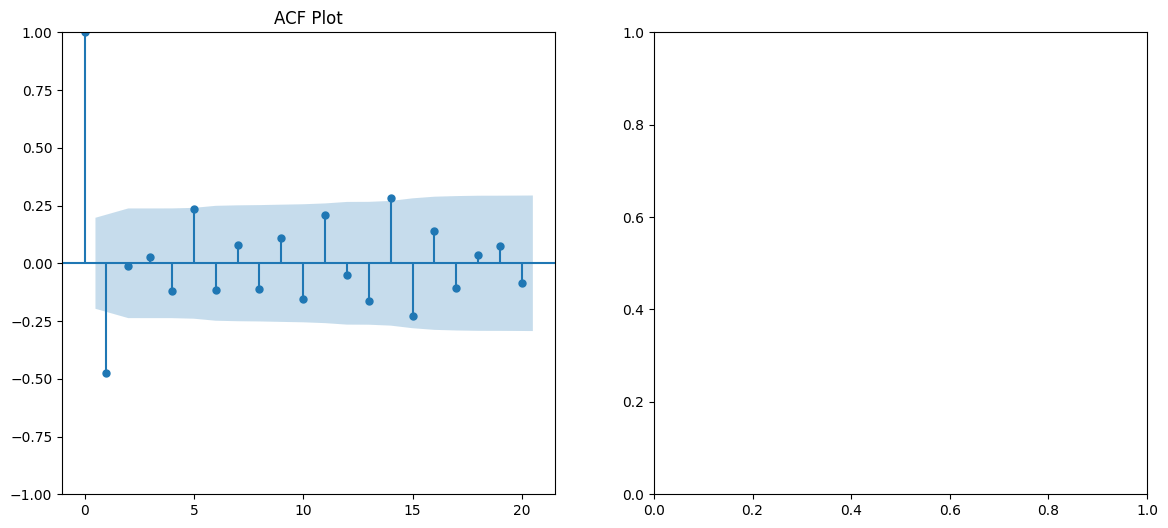

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Create Dummy KRI Data
num_records = 100
dates = pd.date_range(start='2020-01-01', periods=num_records, freq='M')

# Simulating KRIs as random values with some trend and seasonality
kri_values = (np.sin(np.linspace(0, 3 * np.pi, num_records)) + 
              np.random.normal(loc=0, scale=0.5, size=num_records) + 
              np.linspace(0, 1, num_records) * 10)

# Creating DataFrame
kri_data = pd.DataFrame({'Date': dates, 'KRI_Value': kri_values})
kri_data.set_index('Date', inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(kri_data['KRI_Value'], marker='o', linestyle='-', color='blue')
plt.title("Key Risk Indicator (KRI) Over Time")
plt.xlabel("Date")
plt.ylabel("KRI Value")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Check for stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1]  # return p-value for further checks

# ADF test for original series
p_value = adf_test(kri_data['KRI_Value'])
if p_value < 0.05:
    print("Original series is stationary.")
else:
    print("Original series is not stationary. Differencing needed.")

# Step 3: Differencing the series to make it stationary
kri_data_diff = kri_data['KRI_Value'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 5))
plt.plot(kri_data_diff, marker='o', linestyle='-', color='orange')
plt.title("Differenced KRI Values")
plt.xlabel("Date")
plt.ylabel("Differenced KRI Value")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ADF test for differenced series
p_value_diff = adf_test(kri_data_diff)
if p_value_diff < 0.05:
    print("Differenced series is stationary.")
else:
    print("Differenced series is still not stationary; consider further differencing.")

# Step 4: Plot ACF and PACF to identify p and q
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(kri_data_diff, ax=plt.gca(), lags=20)
plt.title("ACF Plot")

plt.subplot(122)


Implementation of Selected Use Case: Anomaly Detection in Transaction Patterns
Below is an example of how to implement the Anomaly Detection in Transaction Patterns use case in Python:

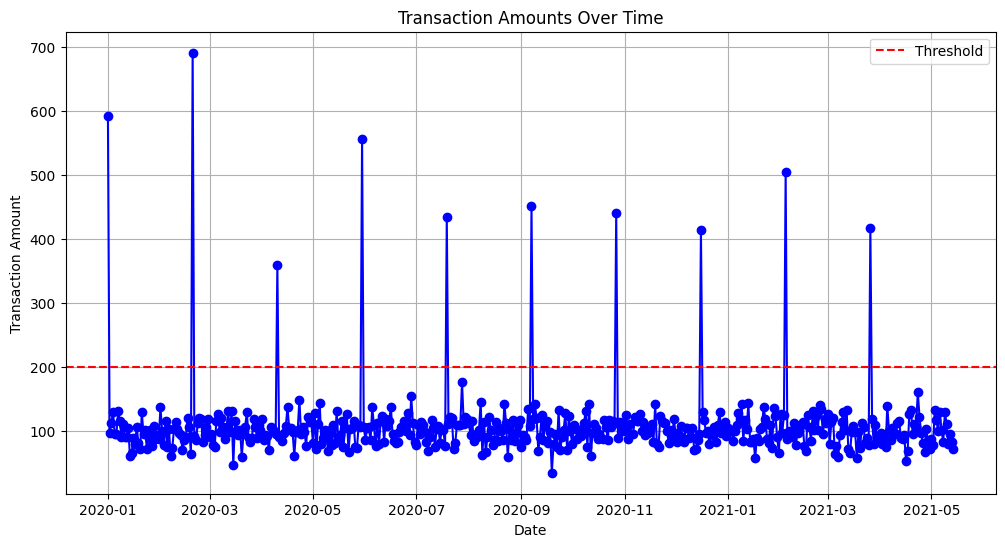

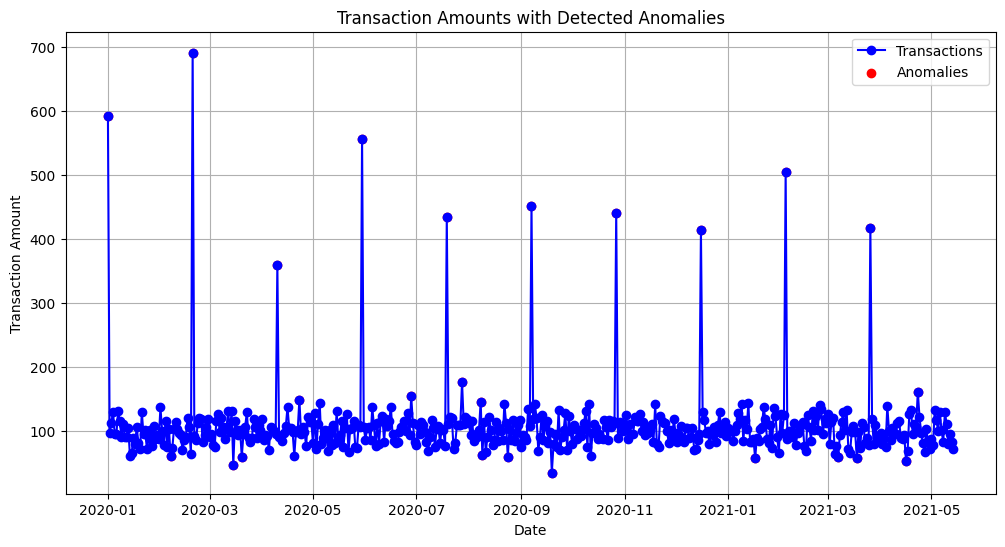

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import adfuller

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Create Dummy Transaction Data
num_records = 500
dates = pd.date_range(start='2020-01-01', periods=num_records, freq='D')
transaction_amounts = np.random.normal(loc=100, scale=20, size=num_records).round(2)

# Introduce anomalies
transaction_amounts[::50] = np.random.normal(loc=500, scale=100, size=len(transaction_amounts[::50]))

# Creating DataFrame
transaction_data = pd.DataFrame({'Date': dates, 'Transaction_Amount': transaction_amounts})
transaction_data.set_index('Date', inplace=True)

# Step 2: EDA
plt.figure(figsize=(12, 6))
plt.plot(transaction_data['Transaction_Amount'], marker='o', linestyle='-', color='blue')
plt.title("Transaction Amounts Over Time")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.axhline(y=200, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid()
plt.show()

# Step 3: Anomaly Detection using Isolation Forest
model = IsolationForest(contamination=0.05)  # Adjust contamination as needed
transaction_data['Anomaly'] = model.fit_predict(transaction_data[['Transaction_Amount']])

# Step 4: Visualizing Anomalies
plt.figure(figsize=(12, 6))
plt.plot(transaction_data['Transaction_Amount'], marker='o', linestyle='-', color='blue', label='Transactions')
plt.scatter(transaction_data[transaction_data['Anomaly'] == -1].index,
            transaction_data[transaction_data['Anomaly'] == -1]['Transaction_Amount'],
            color='red', label='Anomalies')
plt.title("Transaction Amounts with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.legend()
plt.grid()
plt.show()


3. Regulatory Compliance Trends Analysis

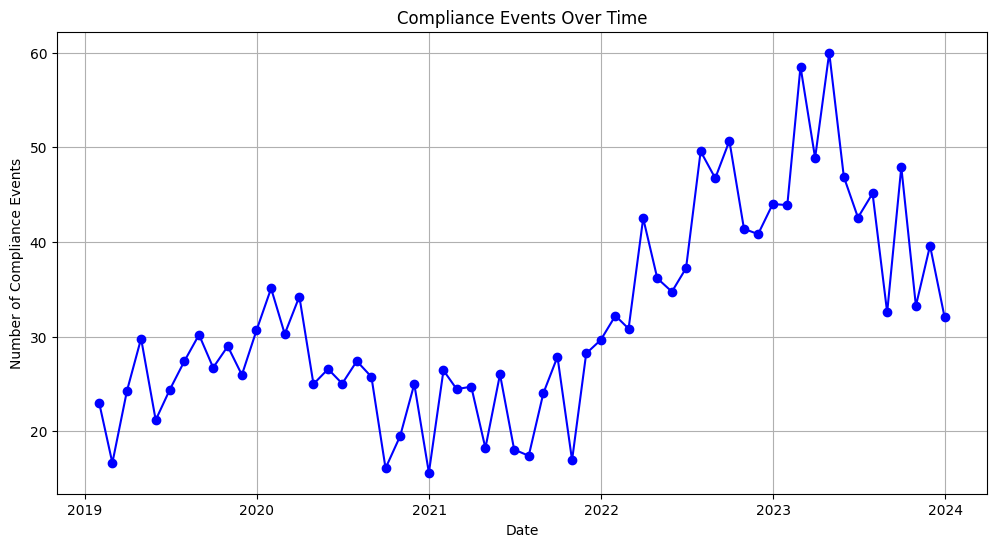

ADF Statistic: -2.3391715715366956
p-value: 0.15964531583291725


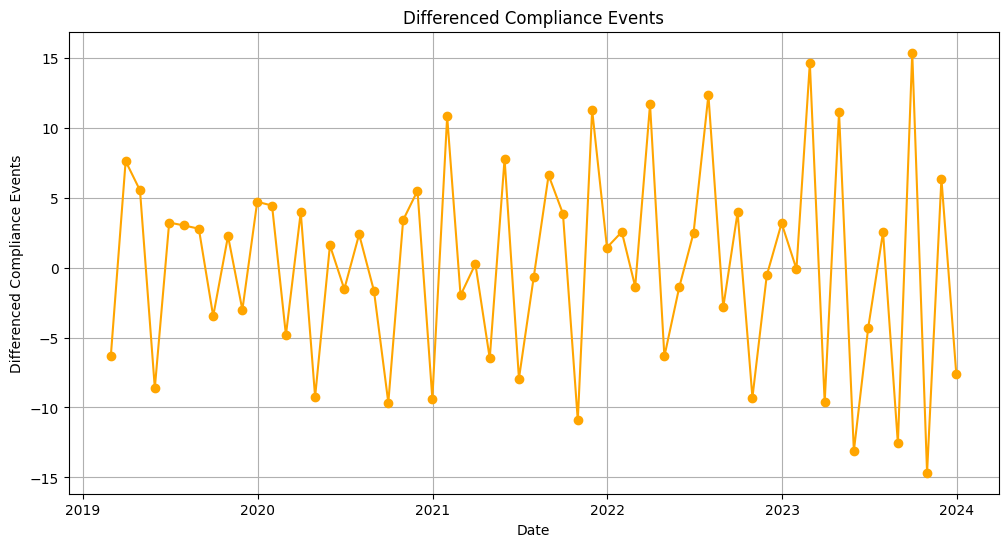

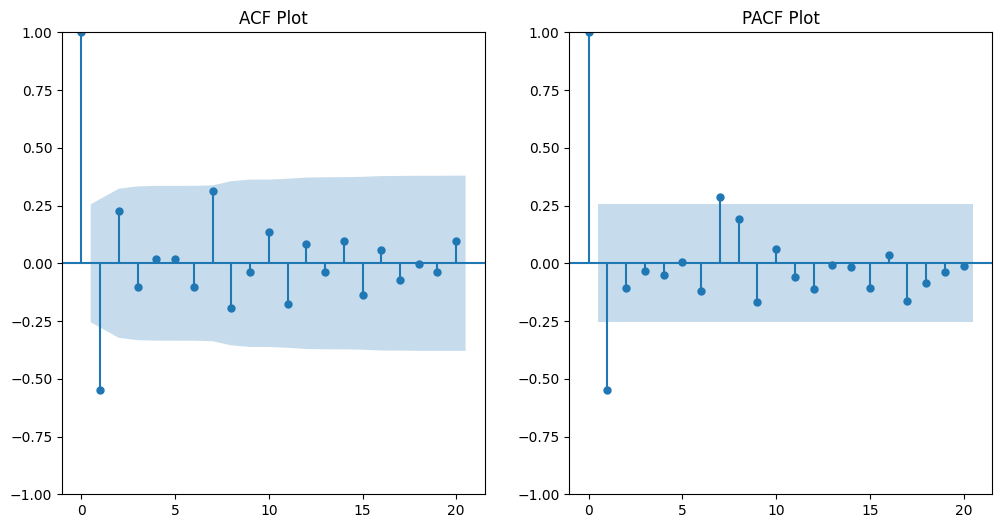

                               SARIMAX Results                                
Dep. Variable:      Compliance_Events   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -189.101
Date:                Mon, 28 Oct 2024   AIC                            388.202
Time:                        11:31:22   BIC                            398.590
Sample:                    01-31-2019   HQIC                           392.257
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2917      3.150     -0.093      0.926      -6.466       5.882
ar.L2          0.1008      1.328      0.076      0.940      -2.503       2.705
ma.L1         -0.3201      3.160     -0.101      0.9

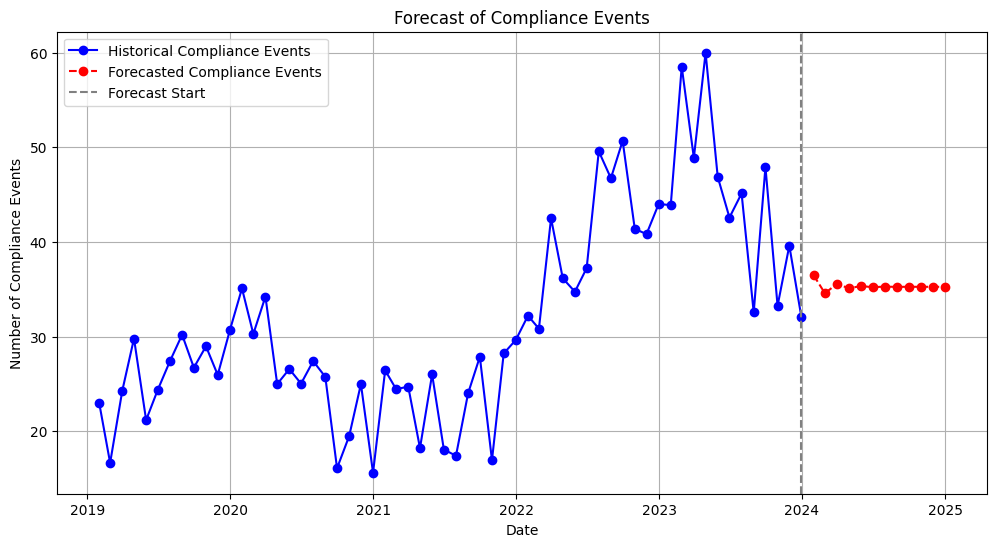

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Step 1: Create Dummy Compliance Data
np.random.seed(42)
date_range = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')
num_records = len(date_range)

# Generating compliance events with some seasonality and trend
compliance_events = (
    np.random.poisson(lam=20, size=num_records) +
    (np.arange(num_records) // 12 * 5) +  # Increasing trend
    (np.sin(np.arange(num_records) / 6) * 10)  # Seasonal effect
)

# Creating DataFrame
compliance_data = pd.DataFrame({'Date': date_range, 'Compliance_Events': compliance_events})
compliance_data.set_index('Date', inplace=True)

# Step 2: EDA
plt.figure(figsize=(12, 6))
plt.plot(compliance_data['Compliance_Events'], marker='o', linestyle='-', color='blue')
plt.title("Compliance Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Compliance Events")
plt.grid()
plt.show()

# Step 3: Stationarity Check
result = adfuller(compliance_data['Compliance_Events'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Step 4: Differencing if non-stationary
compliance_data['Diff'] = compliance_data['Compliance_Events'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(compliance_data['Diff'], marker='o', linestyle='-', color='orange')
plt.title("Differenced Compliance Events")
plt.xlabel("Date")
plt.ylabel("Differenced Compliance Events")
plt.grid()
plt.show()

# Step 5: ACF and PACF Plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(compliance_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF Plot")
plt.subplot(122)
plot_pacf(compliance_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Step 6: Fit ARIMA Model
model = ARIMA(compliance_data['Compliance_Events'], order=(2, 1, 2))  # Example order based on ACF/PACF
model_fit = model.fit()

# Step 7: Model Summary
print(model_fit.summary())

# Step 8: Forecasting
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months
forecast_index = pd.date_range(start=compliance_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 9: Visualization of Forecast
plt.figure(figsize=(12, 6))
plt.plot(compliance_data['Compliance_Events'], marker='o', linestyle='-', color='blue', label='Historical Compliance Events')
plt.plot(forecast_series, marker='o', linestyle='--', color='red', label='Forecasted Compliance Events')
plt.title("Forecast of Compliance Events")
plt.xlabel("Date")
plt.ylabel("Number of Compliance Events")
plt.axvline(x=compliance_data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid()
plt.show()

# Step 10: Evaluate Forecast (if actual data is available)
# Note: For demonstration purposes, we are not evaluating the forecast since we only generated synthetic data.


4. Customer Complaint Trend Analysis

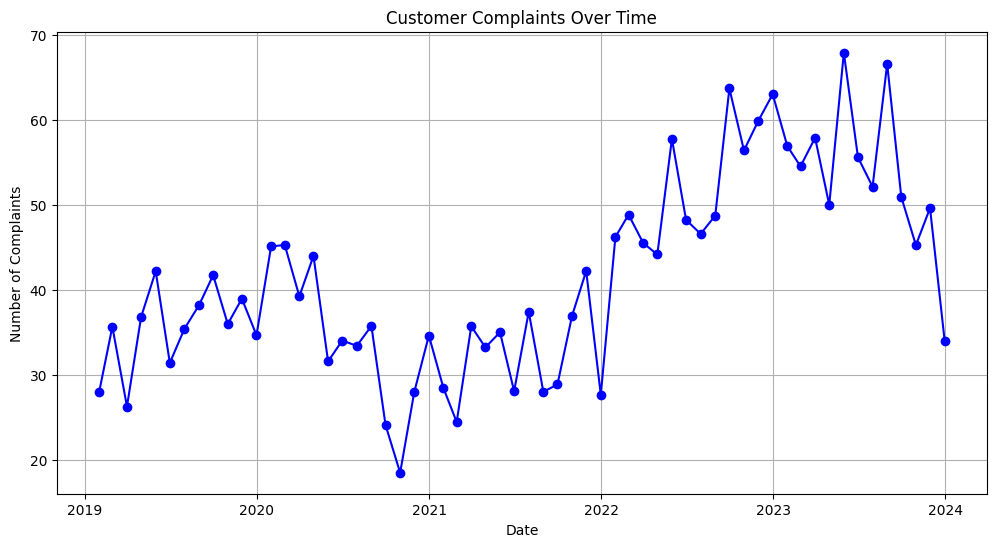

ADF Statistic: -1.4708822205936238
p-value: 0.547863187687895


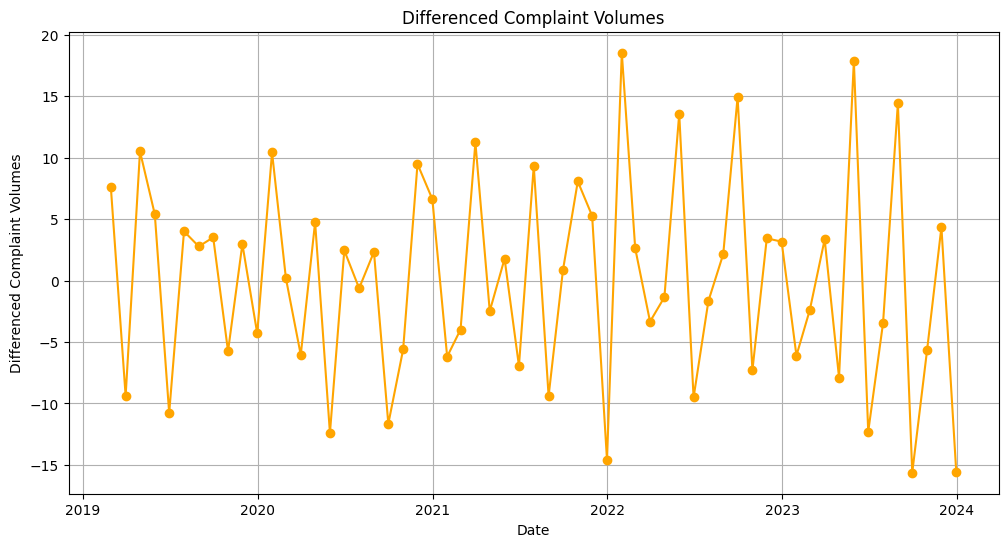

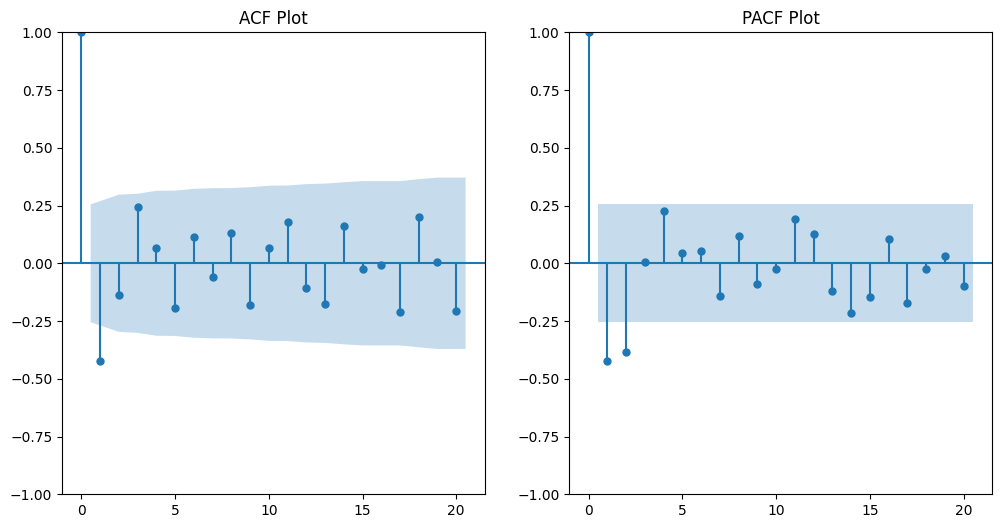

                               SARIMAX Results                                
Dep. Variable:       Complaint_Volume   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -196.904
Date:                Mon, 28 Oct 2024   AIC                            403.809
Time:                        11:32:09   BIC                            414.196
Sample:                    01-31-2019   HQIC                           407.864
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2698      0.223      1.209      0.226      -0.167       0.707
ar.L2         -0.4107      0.192     -2.134      0.033      -0.788      -0.034
ma.L1         -0.9111      0.167     -5.459      0.0

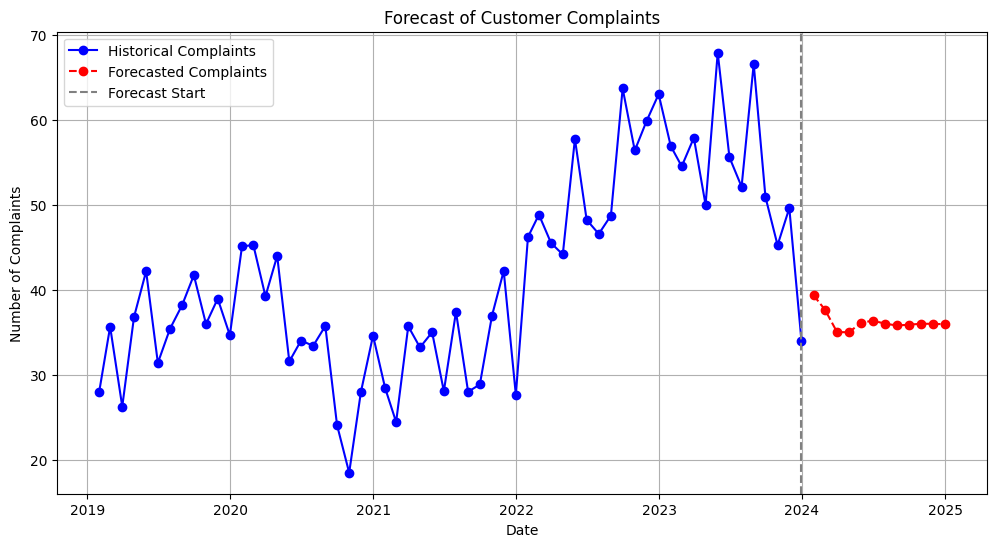

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Create Dummy Complaint Data
np.random.seed(42)
date_range = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')
num_records = len(date_range)

# Generating complaint data with some seasonality and trend
complaint_volumes = (
    np.random.poisson(lam=30, size=num_records) +
    (np.arange(num_records) // 12 * 5) +  # Increasing trend
    (np.sin(np.arange(num_records) / 6) * 10)  # Seasonal effect
)

# Creating DataFrame
complaint_data = pd.DataFrame({'Date': date_range, 'Complaint_Volume': complaint_volumes})
complaint_data.set_index('Date', inplace=True)

# Step 2: EDA
plt.figure(figsize=(12, 6))
plt.plot(complaint_data['Complaint_Volume'], marker='o', linestyle='-', color='blue')
plt.title("Customer Complaints Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.grid()
plt.show()

# Step 3: Stationarity Check
result = adfuller(complaint_data['Complaint_Volume'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Step 4: Differencing if non-stationary
complaint_data['Diff'] = complaint_data['Complaint_Volume'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(complaint_data['Diff'], marker='o', linestyle='-', color='orange')
plt.title("Differenced Complaint Volumes")
plt.xlabel("Date")
plt.ylabel("Differenced Complaint Volumes")
plt.grid()
plt.show()

# Step 5: ACF and PACF Plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(complaint_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF Plot")
plt.subplot(122)
plot_pacf(complaint_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Step 6: Fit ARIMA Model
model = ARIMA(complaint_data['Complaint_Volume'], order=(2, 1, 2))  # Example order based on ACF/PACF
model_fit = model.fit()

# Step 7: Model Summary
print(model_fit.summary())

# Step 8: Forecasting
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months
forecast_index = pd.date_range(start=complaint_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 9: Visualization of Forecast
plt.figure(figsize=(12, 6))
plt.plot(complaint_data['Complaint_Volume'], marker='o', linestyle='-', color='blue', label='Historical Complaints')
plt.plot(forecast_series, marker='o', linestyle='--', color='red', label='Forecasted Complaints')
plt.title("Forecast of Customer Complaints")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.axvline(x=complaint_data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid()
plt.show()

# Step 10: Evaluate Forecast (if actual data is available)
# Note: For demonstration purposes, we are not evaluating the forecast since we only generated synthetic data.


5. Capacity and Resource Utilization Forecasting

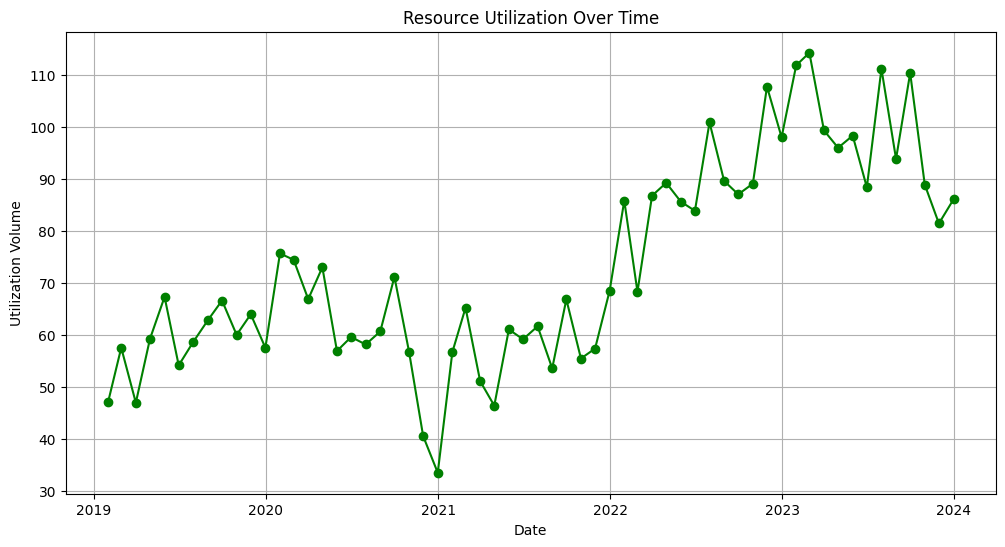

ADF Statistic: -1.6469465229165465
p-value: 0.45863338615473603


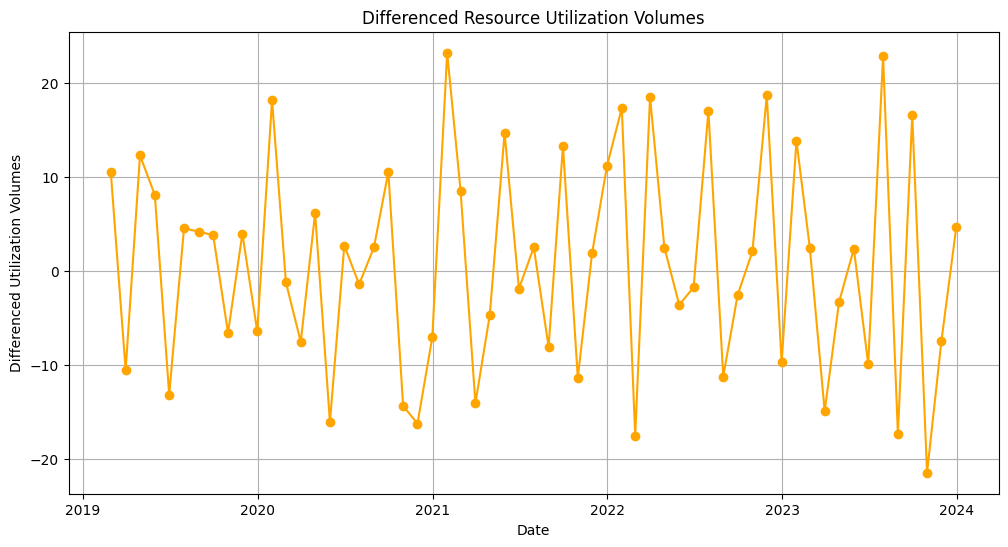

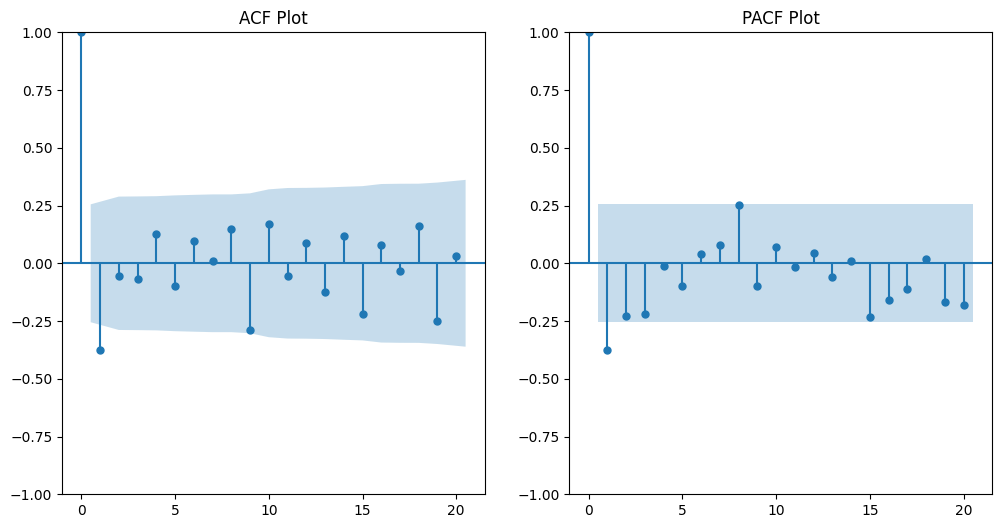

                               SARIMAX Results                                
Dep. Variable:     Utilization_Volume   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -217.615
Date:                Mon, 28 Oct 2024   AIC                            445.230
Time:                        11:33:09   BIC                            455.618
Sample:                    01-31-2019   HQIC                           449.285
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2018      0.153      7.841      0.000       0.901       1.502
ar.L2         -0.3763      0.151     -2.491      0.013      -0.672      -0.080
ma.L1         -1.8147      0.133    -13.599      0.0

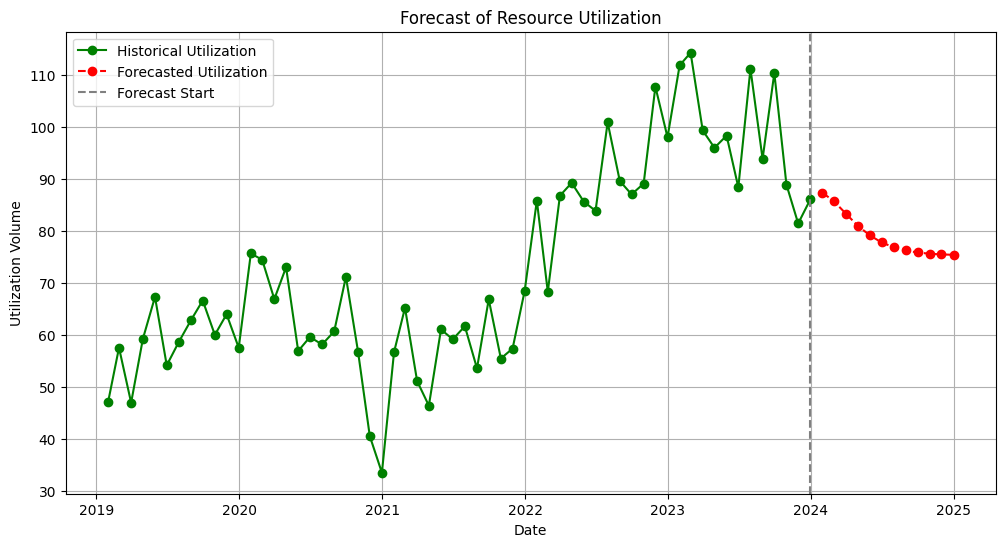

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Create Dummy Resource Utilization Data
np.random.seed(42)
date_range = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')
num_records = len(date_range)

# Generating resource utilization data with some seasonality and trend
utilization_volumes = (
    np.random.poisson(lam=50, size=num_records) +
    (np.arange(num_records) // 12 * 10) +  # Increasing trend
    (np.sin(np.arange(num_records) / 6) * 15)  # Seasonal effect
)

# Creating DataFrame
utilization_data = pd.DataFrame({'Date': date_range, 'Utilization_Volume': utilization_volumes})
utilization_data.set_index('Date', inplace=True)

# Step 2: EDA
plt.figure(figsize=(12, 6))
plt.plot(utilization_data['Utilization_Volume'], marker='o', linestyle='-', color='green')
plt.title("Resource Utilization Over Time")
plt.xlabel("Date")
plt.ylabel("Utilization Volume")
plt.grid()
plt.show()

# Step 3: Stationarity Check
result = adfuller(utilization_data['Utilization_Volume'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Step 4: Differencing if non-stationary
utilization_data['Diff'] = utilization_data['Utilization_Volume'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(utilization_data['Diff'], marker='o', linestyle='-', color='orange')
plt.title("Differenced Resource Utilization Volumes")
plt.xlabel("Date")
plt.ylabel("Differenced Utilization Volumes")
plt.grid()
plt.show()

# Step 5: ACF and PACF Plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(utilization_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF Plot")
plt.subplot(122)
plot_pacf(utilization_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Step 6: Fit ARIMA Model
model = ARIMA(utilization_data['Utilization_Volume'], order=(2, 1, 2))  # Example order based on ACF/PACF
model_fit = model.fit()

# Step 7: Model Summary
print(model_fit.summary())

# Step 8: Forecasting
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months
forecast_index = pd.date_range(start=utilization_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 9: Visualization of Forecast
plt.figure(figsize=(12, 6))
plt.plot(utilization_data['Utilization_Volume'], marker='o', linestyle='-', color='green', label='Historical Utilization')
plt.plot(forecast_series, marker='o', linestyle='--', color='red', label='Forecasted Utilization')
plt.title("Forecast of Resource Utilization")
plt.xlabel("Date")
plt.ylabel("Utilization Volume")
plt.axvline(x=utilization_data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid()
plt.show()

# Step 10: Evaluate Forecast (if actual data is available)
# Note: For demonstration purposes, we are not evaluating the forecast since we only generated synthetic data.


Cybersecurity Incident Trend Forecasting

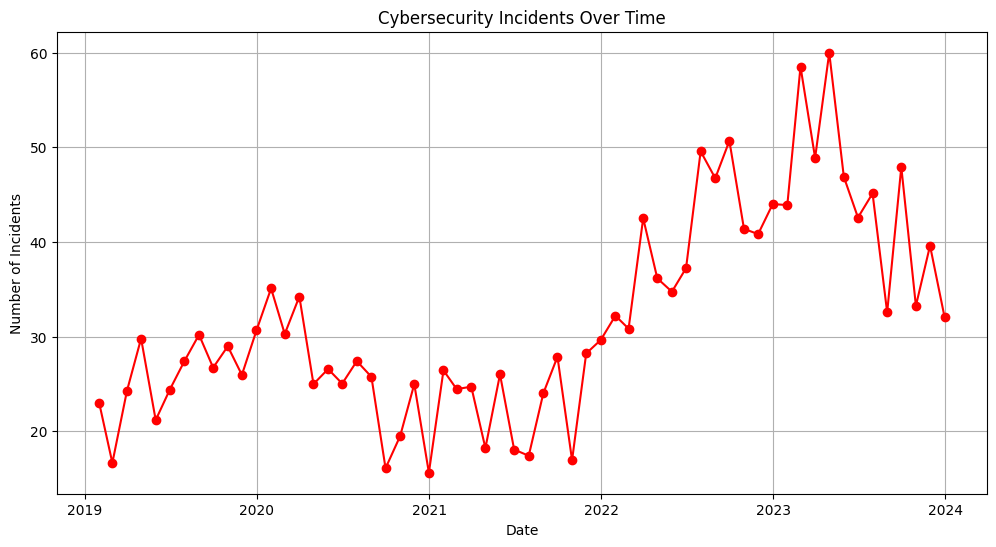

ADF Statistic: -2.3391715715366956
p-value: 0.15964531583291725


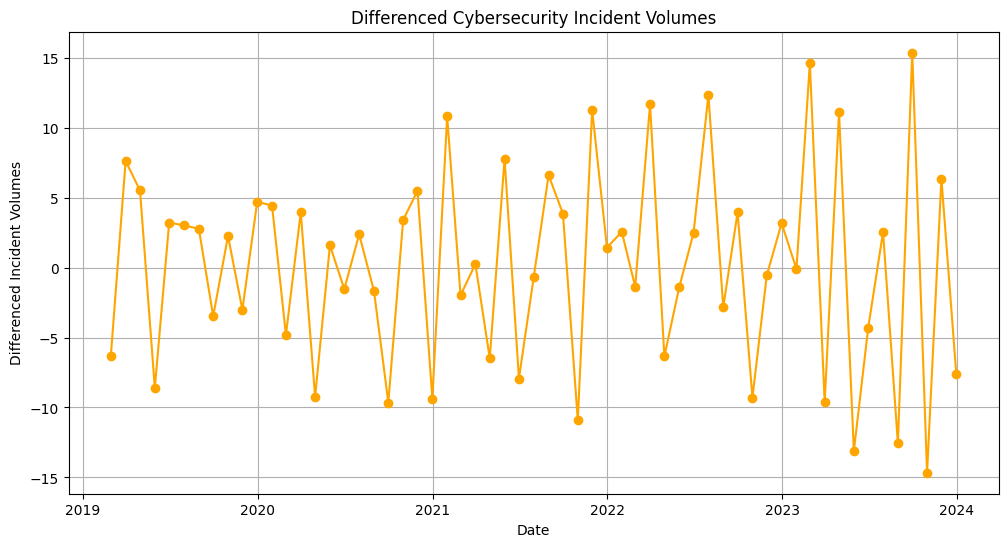

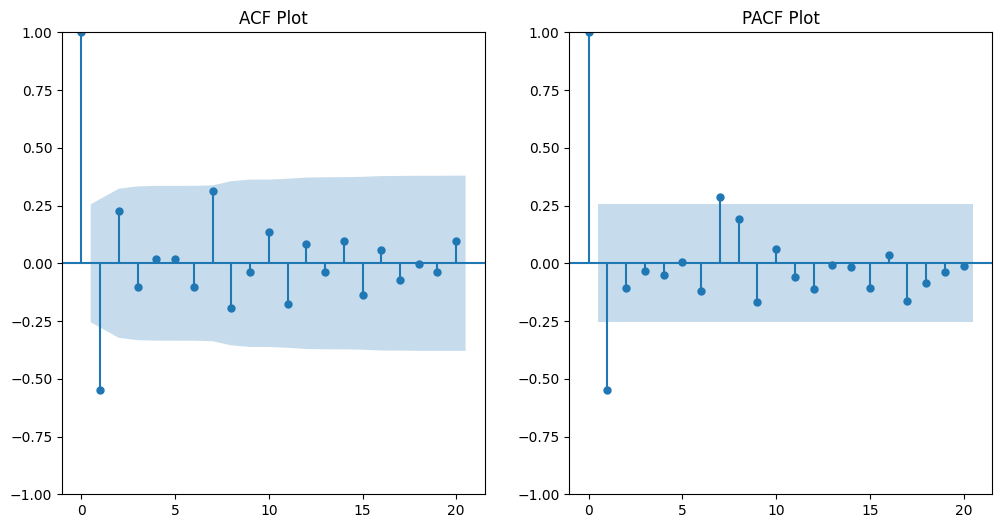

                               SARIMAX Results                                
Dep. Variable:        Incident_Volume   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -189.101
Date:                Mon, 28 Oct 2024   AIC                            388.202
Time:                        11:33:59   BIC                            398.590
Sample:                    01-31-2019   HQIC                           392.257
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2917      3.150     -0.093      0.926      -6.466       5.882
ar.L2          0.1008      1.328      0.076      0.940      -2.503       2.705
ma.L1         -0.3201      3.160     -0.101      0.9

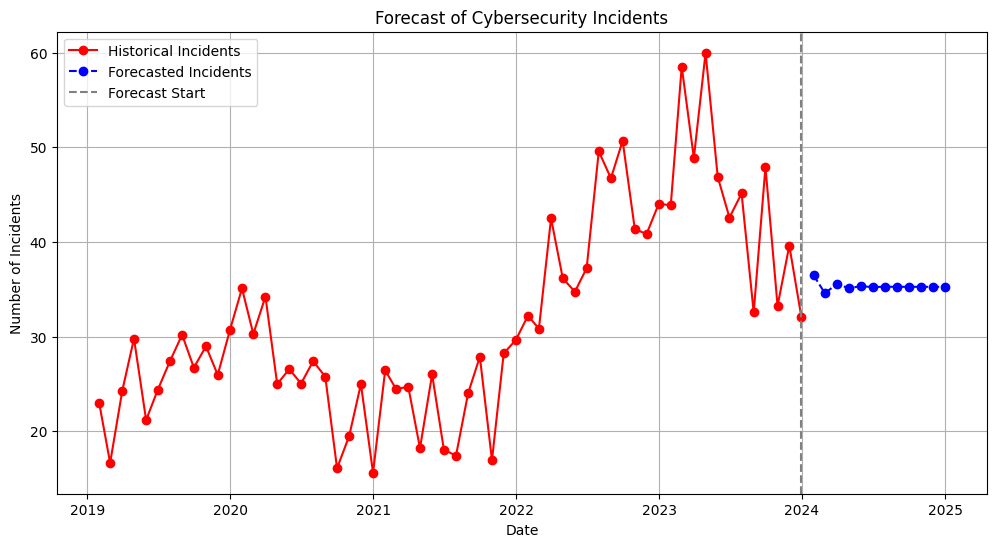

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Create Dummy Cybersecurity Incident Data
np.random.seed(42)
date_range = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')
num_records = len(date_range)

# Generating incident data with some seasonality and trend
incident_volumes = (
    np.random.poisson(lam=20, size=num_records) +
    (np.arange(num_records) // 12 * 5) +  # Increasing trend
    (np.sin(np.arange(num_records) / 6) * 10)  # Seasonal effect
)

# Creating DataFrame
incident_data = pd.DataFrame({'Date': date_range, 'Incident_Volume': incident_volumes})
incident_data.set_index('Date', inplace=True)

# Step 2: EDA
plt.figure(figsize=(12, 6))
plt.plot(incident_data['Incident_Volume'], marker='o', linestyle='-', color='red')
plt.title("Cybersecurity Incidents Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.grid()
plt.show()

# Step 3: Stationarity Check
result = adfuller(incident_data['Incident_Volume'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Step 4: Differencing if non-stationary
incident_data['Diff'] = incident_data['Incident_Volume'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(incident_data['Diff'], marker='o', linestyle='-', color='orange')
plt.title("Differenced Cybersecurity Incident Volumes")
plt.xlabel("Date")
plt.ylabel("Differenced Incident Volumes")
plt.grid()
plt.show()

# Step 5: ACF and PACF Plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(incident_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF Plot")
plt.subplot(122)
plot_pacf(incident_data['Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF Plot")
plt.show()

# Step 6: Fit ARIMA Model
model = ARIMA(incident_data['Incident_Volume'], order=(2, 1, 2))  # Example order based on ACF/PACF
model_fit = model.fit()

# Step 7: Model Summary
print(model_fit.summary())

# Step 8: Forecasting
forecast = model_fit.forecast(steps=12)  # Forecast next 12 months
forecast_index = pd.date_range(start=incident_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 9: Visualization of Forecast
plt.figure(figsize=(12, 6))
plt.plot(incident_data['Incident_Volume'], marker='o', linestyle='-', color='red', label='Historical Incidents')
plt.plot(forecast_series, marker='o', linestyle='--', color='blue', label='Forecasted Incidents')
plt.title("Forecast of Cybersecurity Incidents")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.axvline(x=incident_data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid()
plt.show()

# Step 10: Evaluate Forecast (if actual data is available)
# Note: For demonstration purposes, we are not evaluating the forecast since we only generated synthetic data.
